# Vidyabagish

## MLND - Capstone Project

## Domain Background

Deep learning (also known as deep structured learning or hierarchical learning) is the application of artificial neural networks (ANNs) to learning tasks that contain more than one hidden layer. Deep learning is part of a broader family of machine learning methods based on learning data representations, as opposed to task-specific algorithms.With Deep Learning, it is now possible for an algorithm to predict things, classify images (objects) with great accuracy, detect fraudulent transactions, generate image, sound and text. These are tasks that were previously not possible to achieve by an algorithm and now perform better than a human.

In this project we will focus on Text Generation. Text Generation is part of Natural Language Processing and can be used totranscribe speech to text, performmachine translation, generate handwritten text, image captioning, generate new blog posts or news headlines.

![Basic RNN -> Unrolled RNN](images/basic_unrolled_RNN.png)

In order to generate text, we will look at a class of Neural Network where connections between units form a directed cycle, called Recurrent Neural Network (RNNs). RNNs use an internal memory to process sequences of elements and is able to learn from the syntactic structure of text. Our model will be able to generate text based on the text we train it with.

## Problem Statement

Ramchandra Vidyabagish, was an Indian lexicographer and Sanskrit scholar. He is known for his Bangabhashabhidhan, the first monolingual Bengali dictionary, published in 1817.

Unfortunately, Vidyabagish passed away 100 years ago and he will not be publishing new novels. But, wouldn’t it be great if we could generate some text inspired on Jyotish Sangrahasar and other novels he published?

To solve our problem, we can use text from novels written by Vidyabagish in combination with the incredible power of Deep Learning, in particular RNNs, to generate text. Our deep learning model will be trained on existing Vidyabagish works and will output new text, based on the internal representation of the text it was trained on, in the Neural Network.  

![LSTM Cell](images/lstm_cell.png)

LSTM Cell

For our model to learn, we will use a special type of RNN called LSTMs (Long Short Term Memory), capable of learning long-term dependencies. LSTM can use its memory to generate complex, [realistic sequences](https://arxiv.org/pdf/1308.0850.pdf) containing long-range structure, just like the sentences that we want to generate. It will be able to remember information for a period of time, which will help at generating text of better quality. 

## Metrics

The purpose of this project, is to create a model that will be able to generate text inspired in novels written by Vidyabagish.

The performance of our model will be measure by:
- [Perplexity](https://en.wikipedia.org/wiki/Perplexity) is a commonly used evaluation metric when generating text. Perplexity tells us how many words is the model considering as an output, having a perplexity of 3 means that the model could choose 3 words at an equally likely probability, we want our perplexity be as low as possible since lower choice corresponds to a higher likelihood of choosing the actually correct one.

    The typical measure reported in the papers is average per-word perplexity (often just called perplexity), which is equal to

    $$e^{-\frac{1}{N}\sum_{i=1}^{N} \ln p_{\text{target}_i}} = e^{\text{loss}}$$

    Our goal is to achieving a **perplexity of less than 3.** Which is lower than the perplexity achieved by [similar models](https://web.stanford.edu/class/cs224n/reports/2737434.pdf) used for text generation. 


- Grammatically our model is able to:
    - Open, close quotations
    - Sentence length is similar to the median sentence length of the dataset. We will use the median as there is a large number of empty sentences (between paragraphs, separating chapters, after a title), which can skew our data. See histogram below.
    - Create paragraphs

## Datasets and Input

To train our model we will use the text from his novel Jyotish Sangrahasar and Bachaspati Mishrer Vivadachintamanih. All the novels are no longer protected under copyright and thanks to David Hare for providing the pdf file of these book.

Even though Vidyabagish native language was Bengali, the text used to train our model will be in English. This is to make it easier for the reader to understand the input and output of our model.

Our Dataset is small as it is composed of only 2 files - Jyotish Sangrahasar and Bachaspati Mishrer Vivadachintamanih with a total size of 3.4 MB. Bigger datasets work better when training an RNN but for our case that is very specific it will be enough. Some additional information of the contents of the files below:

| Name | Size | Pages | Lines | Words | Unique Words |
|:--- |:---:|:---:| ---:| ----:| ----:| ----:| ----:| -----:|
| Jyotish_Sangrahasar.txt | 2.3 MB| 690 | 40,008 | 429,256 | 42,154 | 
|Bachaspati_Mishrer_Vivadachintamanih.txt | 1.1 MB | 303 | 17,572 | 189,037 |  |

* Note: Values in the table above will change after preprocessing.

There is some manual preprocessing that we will need to do as the text retrieved from Gutenberg Project contains additional content that is not necessary to train the model, for example:

* Preface
* Translator’s Preface
* About the author
* Index
* Dedications
* Footnotes included in Exemplary Novels

**Note:** The files included in the dataset folder no longer contain the additional content mentioned above.

### Loading Data

Lets start by loading our Data and exploring it.

In [1]:
import numpy as np

filenames = ["/home/kabya/Documents/Vidyabagish-text-generation/dataset/Jyotish_Sangrahasar.txt", "/home/kabya/Documents/Vidyabagish-text-generation/dataset/Bachaspati_Mishrer_Vivadachintamanih.txt"]

text = ""

### Exploring our Datasets

Lets extract text from our Datasets to get familiar with the data that we will be processing.

We can see that our sentences are formed of 13 / 14 words. Paragraphs contain 5 or more sentences.

In [2]:
file_contents = ""

with open(filenames[0], "r") as f:
    file_contents += f.read()

text += file_contents

In [3]:
# Sample text of Jyotish_Sangrahasar.txt
print(file_contents[1500:2500])

himself up to reading
books of chivalry with such ardour and avidity that he almost entirely
neglected the pursuit of his field-sports, and even the management of his
property; and to such a pitch did his eagerness and infatuation go that
he sold many an acre of tillageland to buy books of chivalry to read, and
brought home as many of them as he could get. But of all there were none
he liked so well as those of the famous Feliciano de Silva's composition,
for their lucidity of style and complicated conceits were as pearls in
his sight, particularly when in his reading he came upon courtships and
cartels, where he often found passages like "the reason of the unreason
with which my reason is afflicted so weakens my reason that with reason I
murmur at your beauty;" or again, "the high heavens, that of your
divinity divinely fortify you with the stars, render you deserving of the
desert your greatness deserves." Over conceits of this sort the poor
gentleman lost his wits, and used to lie a

In [4]:
file_contents = ""

with open(filenames[1], "r") as f:
    file_contents += f.read()
    
text += file_contents

In [5]:
# Sample text of Bachaspati_Mishrer_Vivadachintamanih.txt
print(file_contents[3500:4500])

t all the pains they took for that
purpose proved vain, and the wishes they had felt on the subject
gradually diminished, as the attempt appeared more and more hopeless.
Thus, devoted to their studies, and varying these with such amusements
as are permitted to their age, the young men passed a life as cheerful
as it was honourable, rarely going out at night, but when they did so,
it was always together and well armed.

One evening, however, when Don Juan was preparing to go out, Don
Antonio expressed his desire to remain at home for a short time, to
repeat certain orisons: but he requested Don Juan to go without him, and
promised to follow him.

"Why should I go out to wait for you?" said Don Juan. "I will stay; if
you do not go out at all to-night, it will be of very little
consequence." "By no means shall you stay," returned Don Antonio: "go
and take the air; I will be with you almost immediately, if you take the
usual way."

"Well, do as you please," said Don Juan: "if you come you 

### Statistics of our Dataset

As explained in the Metrics section, we can see that there is a large number of empty sentences in our dataset.

In [6]:
# Preparing data to do some stats
chapters = text.split('\n\n\n\n')
sentence_count_chapter = [chapter.count('\n') for chapter in chapters]
sentences = [sentence for chapter in chapters for sentence in chapter.split('\n')]
word_count_sentence = [len(sentence.split()) for sentence in sentences]

In [7]:
print('Dataset Stats')
print('Unique words: {}'.format(len({word: None for word in text.split()})))
print('Number of chapters: {}'.format(len(chapters)))
print('Average number of sentences in each chapters: {}'.format(np.average(sentence_count_chapter)))
print('Number of lines: {}'.format(len(sentences)))
print('Median number of words in each line: {}'.format(np.median(word_count_sentence)))
print('Average number of words in each line: {}'.format(np.mean(word_count_sentence)))

Dataset Stats
Unique words: 39229
Number of chapters: 135
Average number of sentences in each chapters: 392.7925925925926
Number of lines: 53162
Median number of words in each line: 13.0
Average number of words in each line: 10.975941461946503


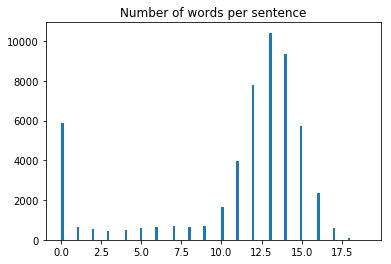

In [8]:
import matplotlib.pyplot as plt

plt.hist(word_count_sentence, bins="auto")
plt.title("Number of words per sentence")
plt.show()

### Extra Preprocessing 
We need to prepare our data for our RNN, lets do some additional preprocessing:
* Lookup table: We need to create [word embeddings](https://www.tensorflow.org/tutorials/word2vec#motivation_why_learn_word_embeddings) to facilitate the training of our model. 

* Tokenize punctuation: This is to simplify training for our neural network. Making it easy for it to distinguish between *mad* and *mad!*

In [9]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

def create_lookup_tables(text):
    """
    Create lookup tables for vocabulary
    :param text: The text of dataset split into words
    :return: A tuple of dicts (vocab_to_int, int_to_vocab)
    """
    counts = Counter(text)
    vocab = sorted(counts, key=counts.get, reverse=True)
    
    vocab_to_int = {word: i for i, word in enumerate(vocab)}
    int_to_vocab = {v:k for k, v in vocab_to_int.items()}
    
    return vocab_to_int, int_to_vocab


### Tokenize Punctuation
We'll be splitting the script into a word array using spaces as delimiters.  However, punctuations like periods and exclamation marks make it hard for the neural network to distinguish between the word "mad" and "mad!".

Implement the function `token_lookup` to return a dict that will be used to tokenize symbols like "!" into "||Exclamation_Mark||".  Create a dictionary for the following symbols where the symbol is the key and value is the token:
- Period ( . )
- Comma ( , )
- Quotation Mark ( " )
- Semicolon ( ; )
- Exclamation mark ( ! )
- Question mark ( ? )
- Left Parentheses ( ( )
- Right Parentheses ( ) )
- Dash ( -- )
- Return ( \n )

This dictionary will be used to token the symbols and add the delimiter (space) around it.  This separates the symbols as it's own word, making it easier for the neural network to predict on the next word. 

In [10]:
token_lookup = {".": "||period||", \
         ",": "||comma||", \
         '"': "||quotation_mark||", \
         ";": "||semicolon||", \
         "!": "||exclamation_mark||", \
         "?": "||question_mark||", \
         "(": "||l_parenthesis||", \
         ")": "||r_parenthesis||", \
         "--": "||dash||", \
         "\n": "||return||"}

Lets preprocess all the data and save it to file.

In [11]:
import pickle

for key, token in token_lookup.items():
    text = text.replace(key, ' {} '.format(token))

text = text.split()

vocab_to_int, int_to_vocab = create_lookup_tables(text)

int_text = [vocab_to_int[word] for word in text]

# Saving the preprocessed data
pickle.dump((int_text, vocab_to_int, int_to_vocab, token_lookup), open('preprocess.p', 'wb'))

## Preprocess Check Point
The preprocessed data has been saved to disk. No need to preprocess it again, by running the cell below it will be available to the notebook.

In [12]:
import numpy as np
import pickle

int_text, vocab_to_int, int_to_vocab, token_dict = pickle.load(open('preprocess.p', mode='rb'))

## Vidyabagish Neural Network
Before getting started, lets check some requirements to run the Neural Network



### Check the Version of TensorFlow and Access to GPU

A GPU is suggested to train the Vidyabagish Neural Network as text generation takes a long time to train.

In [7]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer'
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network as text generation takes a long time to train in order to achieve good results.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Neural Network Code
The building blocks of the Vidyabagish Neural Network are include in Vidyabagish_nn.py. If you want to view the code run *Vidyabagishnn??* in a separate cell after importing it.

Functions included in Vidyabagish_nn:
- get_inputs: Creates the TF Placeholders for the Neural Network
- get_init_cell: Creates our RNN cell and initialises it.
- get_embed: Applies [embedding](https://www.tensorflow.org/tutorials/word2vec) to our input data.
- build_rnn: Creates a RNN using a RNN cell
- build_nn: Apply embedding to input data using your get_embed function. Builds RNN using cell and the build_rnn function. Finally, it applies a [fully connected layer](https://www.tensorflow.org/api_docs/python/tf/contrib/layers/fully_connected) with a linear activation.
- get_batches: Creates a generator that returns batches of data used during training

#### Loss Function
To calculate the loss of our Neural Network, we are using [sequence_loss](https://www.tensorflow.org/api_docs/python/tf/contrib/seq2seq/sequence_loss) as our loss function.

We want to minimize the average negative log probability of the target words:

$$loss = -\frac{1}{N}\sum_{i=1}^{N} \ln p_{\text{target}_i}$$

The typical measure reported in the papers is average per-word perplexity (often just called perplexity), which is equal to

$$e^{-\frac{1}{N}\sum_{i=1}^{N} \ln p_{\text{target}_i}} = e^{\text{loss}}$$

and we will monitor its value throughout the training process.

In [13]:
import Vidyabagish_nn as Vidyabagishnn

Vidyabagishnn.reset_graph()

In [17]:
# View the code of Vidyabagish_nn
Vidyabagishnn??

## Vidyabagish Neural Network Training
### Hyperparameters
The following parameters are used to tune the Neural Network:

- `batch_size`: The number of training examples in one pass.
- `num_epochs`: One pass of all the training examples.
- `rnn_layer_size`: Number of RNN layers
- `rnn_size`: Size of the RNNs.
- `embed_dim`: Size of the embedding.
- `seq_length`: Number of words included in every sequence, e.g. sequence of five words. 
- `learning_rate`: How fast/slow the Neural Network will train.
- `dropout`: Simple way to prevents an RNN from overfitting - [link](http://jmlr.org/papers/v15/srivastava14a.html).
- `show_every_n_batches`: Number of batches the neural network should print progress.
- `save_every_n_epochs`: Number of epochs the neural network should save progress.

In [14]:
# Batch Size
batch_size = 512
# Number of Epochs
num_epochs = 700
# RNN Layers
rnn_layer_size = 2
# RNN Size
rnn_size = 256
# Embedding Dimension Size
# Using 300 as it is commonly used in Google's news word vectors and the GloVe vectors
embed_dim = 300
# Sequence Length
seq_length = 10
# Learning Rate
learning_rate = 0.001
# Dropout
dropout = 0.6

# Show stats for every n number of batches
show_every_n_batches = 100
# Save progress for every n number of epochs
save_every_n_epochs = 100

run_id = '0007'

# Define saving directories
save_dir = './checkpoints/save'
logs_dir = './logs/'

### Build the Graph
Build the graph using Vidyabagish neural network

In [15]:
from tensorflow.contrib import seq2seq

train_graph = tf.Graph()
with train_graph.as_default():
    # Inputs
    vocab_size = len(int_to_vocab)
    input_text, targets, lr = Vidyabagishnn.get_inputs()
    input_data_shape = tf.shape(input_text)
    
    # Define the RNN cell
    cell, initial_state = Vidyabagishnn.get_init_cell(batch_size=input_data_shape[0], 
                                               rnn_layers=rnn_layer_size, 
                                               rnn_size=rnn_size,
                                               keep_prob=dropout)
    # Builds Neural Network
    logits, final_state = Vidyabagishnn.build_nn(cell, input_text, vocab_size, embed_dim,
                                         batch_size, rnn_layer_size, rnn_size, dropout)

    
    # Probabilities for generating words
    probs = tf.nn.softmax(logits, name='probs')

    # Loss function
    cost = seq2seq.sequence_loss(
        logits,
        targets,
        tf.ones([input_data_shape[0], input_data_shape[1]]))

    # Optimizer
    optimizer = tf.train.AdamOptimizer(lr)

    # Gradient Clipping
    gradients = optimizer.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients if grad is not None]
    train_op = optimizer.apply_gradients(capped_gradients)

RNN Layers: 2 and Size: 256, Batch Size: Tensor("strided_slice:0", shape=(), dtype=int32)
(?, ?, 300)
RNN Layers: 2 and Size: 256, Batch Size: 512


## Train
Train Vidyabagish neural network on the preprocessed data.

In [ ]:
batches = Vidyabagishnn.get_batches(int_text, batch_size, seq_length)

# file_name_suffix = "-lr-{}-epochs-{}-sqe_length-{}-".format(learning_rate, num_epochs, seq_length)

training_log = "batch_size: {}\nepochs: {}\nrnn_layer_size: {}\nrnn_size: {}\nembed_dim: {}\nseq_length: {}\nlr: {}\ndropout: {}\n--------\n".format(batch_size, num_epochs, rnn_layer_size, rnn_size, embed_dim, seq_length, learning_rate, dropout)

with tf.Session(graph=train_graph) as sess:
    sess.run(tf.global_variables_initializer())

    for epoch_i in range(num_epochs):
        state = sess.run(initial_state, {input_text: batches[0][0]})

        for batch_i, (x, y) in enumerate(batches):
            feed = {
                input_text: x,
                targets: y,
                initial_state: state,
                lr: learning_rate}
            train_loss, state, _ = sess.run([cost, final_state, train_op], feed)

            # Show every <show_every_n_batches> batches
            if (epoch_i * len(batches) + batch_i) % show_every_n_batches == 0:
                current_log = 'Epoch {:>3} Batch {:>4}/{}   train_loss = {:.3f}'.format(
                    epoch_i,
                    batch_i,
                    len(batches),
                    train_loss)
                training_log += current_log + "\n"
                print(current_log)
                
                # Save every 100 epochs
                if (epoch_i + 1) % save_every_n_epochs == 0:
                    saver = tf.train.Saver()
                    saver.save(sess, save_dir + '-' + run_id + '--c_epoch-' + str(epoch_i + 1))
                    model_saved_msg = 'Model Trained and Saved - Epoch: ' + str(epoch_i + 1)
                    print(model_saved_msg)
                    training_log += model_saved_msg + "\n"
                

    # Save Model
    saver = tf.train.Saver()
    saver.save(sess, save_dir)
    print('Model Trained and Saved')
    
    text_file = open(logs_dir + "training_log-{}.txt".format(run_id), "w")
    text_file.write(training_log)
    text_file.close()

Epoch   0 Batch    0/141   train_loss = 9.989
Epoch   0 Batch  100/141   train_loss = 6.210
Epoch   1 Batch   59/141   train_loss = 6.192
Epoch   2 Batch   18/141   train_loss = 6.254
Epoch   2 Batch  118/141   train_loss = 6.199
Epoch   3 Batch   77/141   train_loss = 6.179
Epoch   4 Batch   36/141   train_loss = 6.242
Epoch   4 Batch  136/141   train_loss = 6.187
Epoch   5 Batch   95/141   train_loss = 6.175
Epoch   6 Batch   54/141   train_loss = 6.260
Epoch   7 Batch   13/141   train_loss = 6.229
Epoch   7 Batch  113/141   train_loss = 6.191
Epoch   8 Batch   72/141   train_loss = 6.203
Epoch   9 Batch   31/141   train_loss = 6.196
Epoch   9 Batch  131/141   train_loss = 6.156
Epoch  10 Batch   90/141   train_loss = 6.141
Epoch  11 Batch   49/141   train_loss = 5.984
Epoch  12 Batch    8/141   train_loss = 5.699
Epoch  12 Batch  108/141   train_loss = 5.483
Epoch  13 Batch   67/141   train_loss = 5.378
Epoch  14 Batch   26/141   train_loss = 5.153
Epoch  14 Batch  126/141   train_l

## Save Parameters
Save `seq_length` and `save_dir` for generating a new Vidyabagish text.

In [ ]:
# Save parameters for checkpoint
pickle.dump((seq_length, save_dir), open('params-{}.p'.format(run_id), 'wb'))

## Training results

The table below captures the results of training the Vidyabagish Neural Network with different hyperparameters:

| Run ID | Batch Size | Epochs | RNN Layers | RNN Size | Embed Dim | Seq Length | LR | Dropout | Train Loss |
|:---:|:---:|:---:|:---:|:----:|:----:|:----:|:----:|:-----:|
| 0001 | 512 | 300 | 2 | 256 | 300 | 5 | 0.01 | 0.6 | 3.438 |
| 0002 | 512 | 500 | 2 | 256 | 300 | 5 | 0.001 | 0.6 | 1.488 |
| 0003 | 512 | 300 | 2 | 256 | 300 | 10 | 0.01 | 0.6 | 3.015 |
| 0004 | 512 | 500 | 2 | 256 | 300 | 10 | 0.001 | 0.6 | 1.112 |
| 0005 | 512 | 500 | 3 | 256 | 300 | 10 | 0.001 | 0.6 | 1.178 |
| 0006 | 512 | 500 | 3 | 256 | 300 | 20 | 0.001 | 0.6 | 1.317 |
| 0007 | 512 | 700 | 2 | 256 | 300 | 10 | 0.001 | 0.6 | 0.998 |

For a detailed view of the training loss, checkout the [training logs](./logs/) included with the project.

Our models 0004 and 0007 are the best performing when trained with our dataset. 

How does our model performs when compared to our initial expectations (metrics/benchmark)?
- Our benchmark was to create a model that achieves a perplexity of less than 3. Our model is achieving a perplexity of less than 1. Which means, it has a high likelihood of choosing the correct word.
- The paragraph structure generated by our model is similar to the structure from our dataset.
    - The sentences in the paragraph have betwen 10 and 15 words.
    - The paragraphs are formed of 5 or more lines. 

*Observations:*
- In order to generate better quality of text, we  need a large text corpus and in this project we are limited by the amount of text we can use as an input. Saying that, the model is generating text that looks similar to the original text.
- The same algorithm can be used to generate text for different subjects. For example, the same algorithm can be trained to generate text for [Barack Obama](https://en.wikipedia.org/wiki/Barack_Obama). There is a lot more text available for Obama ([books](https://www.amazon.co.uk/Barack-Obama/e/B001H6OA8E), [speeches](http://obamaspeeches.com/))
- A 3 layer RNN takes a long time to train, it might be possible to achieve better results with it but it will need to be trained longer.

### Training Loss

We can see that a learning rate of 0.01 is too large to train our Neural Network. When we trained it with 0.01, we were never able to achieve a train loss < 3. Another indicator of this is that the learning plateaus in both runs (0001, 0003); in *0001* it plateaus at around epoch 100 and in *0003* at around epoch 180.

The training loss improved when we use a learning rate of 0.001. The lower learning rate improves our Neural network performance and we are getting closer to a perplexity of 1. Remember that the lower our perplexity, the better our model is at predicting the next work. 

As the training is not plateauing, we are also able to train it longer. This is why we increase the epochs of run *0002* to 500.

### Sequence Length

Our basic RNN was trained with a sequence length of 5. The sequence length, is the number of words to be included in every sequence.  

We can see an improvement when increasing the sequence length to 10. This means that our RNN will use a longer sequence to train our Neural Network. Which ends up improving significantly the quality of text generated by our network. 

With a sequence length of 5, our text didn't made much sense, the sentences are short and the paragraphs are not well structured. 

When using a model trainer with sequence length of 10, we can notice that the text makes much more sense, and the quality of the sentences and paragraphs improves significantly. 

### Train some more

Our best result in the the first 6 runs was run *0004*. If we train our network longer with the same parameters, we achieve a train loss of less than 1. 

--------------------

## Conclusion

Based on the results, we can see that RNNs are very effective when understanding sequence of text and can be used to generate text.

Our best performing RNN consists of 2 RNN layers of 256 in size. We added some dropout to prevent overfitting and used [Adam](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) to optimise our model.

Generating text is a hard problem to solve in Machine Learning. It takes  a long time to train a simple model and the larger the input the longer it will take to train the model properly. In our training, the models took close to an hour to train.

Even though our train loss for the last run is less than 1, we can see in the samples below that the text generated by *run 0004* and *run 0007* models are similar in several ways, as you would expect when both models have a perplexity that is close to 1:
- They are both able to open and close quotations
- The text makes more sense when compared with *run 0001*, which is expected as the sequence length (10) used to train both models is longer than *run 0001* (5)
- Paragraphs are well formed.
- Sentence length is similar and close to the median sentence length (13).

Text Samples:

- Run 0004:
    " Senor," said Sancho," I mean to know from this perilous journey in the ugly which has been bound;
    " At any rate, Dulcinea," replied the actor
- Run 0007:
    Quixote or cost him his squire, unless indeed his wife might follow him
    Don Quixote bade Sancho he settled three days with open his heart in fixing his affections should comply with Preciosa

### Potential Improvements

There are two ways which we could improve the results of our model:
- Larger text corpus. We can search for more Vidyabagish novels available in English or we can train our model to learn Spanish, as it would be more probable to find the novels in Spanish than English.
- Train our 3 layer, 20 sequence length RNN further. As our model is bigger, we could train it longer and potentially could have better results.

--------------------

Below, we will generate some text to check our results.

## Generate Vidyabagish Text

Before generating text, lets import our preprocessed data and the params of our run.

In [32]:
import tensorflow as tf
import numpy as np
import pickle

_, vocab_to_int, int_to_vocab, token_dict = pickle.load(open('preprocess.p', mode='rb'))
seq_length, meta_dir = pickle.load(open('params-{}.p'.format(run_id), mode='rb'))

The functions below will generate Vidyabagish text based on some input.
- `load_dir`: Location where the graph metadata is saved
- `prime_word`: First word used to generate text
- `gen_length`: Length of text we want to generate.

In [34]:
def pick_word(probabilities, int_to_vocab):
    """
    Pick the next word in the generated text
    :param probabilities: Probabilites of the next word
    :param int_to_vocab: Dictionary of word ids as the keys and words as the values
    :return: String of the predicted word
    """
    # Adding randomness to the word returned
    return np.random.choice(list(int_to_vocab.values()), 1, p=probabilities)[0]
    #return int_to_vocab[np.argmax(probabilities)]

def generate_text(load_dir, prime_word, gen_length):
    """
    Generates text
    :param load_dir: Location where the graph metadata is saved
    :param prime_word: First word used to generate text
    :param gen_length: How long the generated text will be
    :return: Generated text
    """
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        # Load saved model
        loader = tf.train.import_meta_graph(load_dir + '.meta')
        loader.restore(sess, load_dir)

        # Get Tensors from loaded model
        input_text, initial_state, final_state, probs = Vidyabagishnn.get_tensors(loaded_graph)

        # Sentences generation setup
        gen_sentences = [prime_word]
        prev_state = sess.run(initial_state, {input_text: np.array([[1]])})

        # Generate sentences
        for n in range(gen_length):
            # Dynamic Input
            dyn_input = [[vocab_to_int[word] for word in gen_sentences[-seq_length:]]]
            dyn_seq_length = len(dyn_input[0])

            # Get Prediction
            probabilities, prev_state = sess.run(
                [probs, final_state],
                {input_text: dyn_input, initial_state: prev_state})

            pred_word = pick_word(probabilities[dyn_seq_length-1], int_to_vocab)

            gen_sentences.append(pred_word)

        # Remove tokens
        generated_text = ' '.join(gen_sentences)
        for key, token in token_dict.items():
            ending = ' ' if key in ['\n', '(', '"'] else ''
            generated_text = generated_text.replace(' ' + token.lower(), key)
        generated_text = generated_text.replace('\n ', '\n')
        generated_text = generated_text.replace('( ', '(')

        return generated_text
    
def print_text_for(run_id, epochs, initial_word, initial_epoch=100, text_length=100):
    for epoch in range(initial_epoch, epochs + 100, 100):
        print('-----------\n{} at run_id: {}, epoch: {}, text generated: \n------------\n{}'.format(initial_word, run_id, epoch, generate_text(meta_dir + '-' + run_id + '--c_epoch-' + str(epoch), initial_word, text_length)))

Lets start comparing text generated by our different Vidyabagish Neural Networks runs. 

In [17]:
# Run 0001

get_text_for(run_id='0001', epochs=300, initial_word="Quixote", initial_epoch=300, text_length=200)

-----------
Quixote at run_id: 0001, epoch: 300, text generated: 
------------
Quixote," and
my profession abideth about her Majesty then, the cloth was frantic, that it
is
so hast been, that she has not spread of showing and tear resting with him, for the persuasion, leaving him by force or get up by full great
achievements of what book,
Leaves the pastime?"

" I would lay myself upon him with
a burnished hand to the waist.
The thieves laughed at
the other little intelligence, and where the redress, in the service of some dwarf, and
we were in the line of
mutual Sancho, this,
I have not such matters of us with I not heard by which is the best world,
Non when the bano seated myself and Sancho Panza asked the same of his
story, they were excellent wife at once, and here the green intentions of the Judge so cautiously gave her. The blush, and heard them came to over a payment with shepherd, laying round it
he ordered her, and


In [21]:

print_text_for(run_id='0004', epochs=500, initial_word="Quixote", initial_epoch=500, text_length=200)

-----------
Quixote at run_id: 0004, epoch: 500, text generated: 
------------
Quixote," and am the idea thou wilt give more
good quickly to see now thou hast won the good
thing, as I have told them not."

" Senor," said Sancho," I mean to know from
this perilous journey in the ugly which has been bound; for it is
that? What are it in me; but the knight-errant should come free?"

" At any rate, Dulcinea," replied the actor held in nonsense of your wife, master the devil who is so generous that I can go to the house of
Luscinda, Preciosa, and more will by everything the
wrong the beauty itself ought to wash its course.

" What could mean be" The greatest who is long in
his own behalf so long as I have chosen to
Uchali, who shall not go to defend your ass
will run wrong, for the mercy I was now in a
coach that, after having sold their riches and language that
Preciosa asked


In [43]:

print_text_for(run_id='0007', epochs=500, initial_word="Quixote", initial_epoch=500, text_length=200)

-----------
Quixote at run_id: 0007, epoch: 500, text generated: 
------------
Quixote or cost him his squire, unless indeed his
wife might follow him or with great respect. Their
master would be, the blind parents describes, or
look free, and all the rest with your life shall be imagined; the gipsy had
rule come to his heart. The extreme day I have heard of her good; in
the moment of this my house and soul to find
the paper; though, as it were, we
believe it is because they who are dead, and bind
me to undergo the exertion thou great desire, for indeed he said to him cannot read it aloud.

Don Quixote bade Sancho he settled three days with open his heart
in fixing his affections should comply with Preciosa, and
to keep secret whatever will be no wish on, as it was queens as his master had
heard him, he strove to sing him, maintaining the sun favouring befall), which was not of it, both of them, served in her courtesy
for the


## References

* NLP Tokenization - [https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html](https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html)

* Vector Representations of Words - [https://www.tensorflow.org/tutorials/word2vec#motivation_why_learn_word_embeddings](https://www.tensorflow.org/tutorials/word2vec#motivation_why_learn_word_embeddings) 

* Recurrent Neural Networks - [https://www.tensorflow.org/tutorials/recurrent](https://www.tensorflow.org/tutorials/recurrent) 

* Alex Graves - Generating Sequences With Recurrent Neural Networks [https://arxiv.org/pdf/1308.0850.pdf](https://arxiv.org/pdf/1308.0850.pdf)

* Christopher Olah - Understanding LSTM Networks [http://colah.github.io/posts/2015-08-Understanding-LSTMs/](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) 

* Prasad Kawthekar, Raunaq Rewari, Suvrat Bhooshan - Evaluating Generative Models for Text Generation - [https://web.stanford.edu/class/cs224n/reports/2737434.pdf](https://web.stanford.edu/class/cs224n/reports/2737434.pdf) 

* Ilya Sutskever, James Martens, Geoffrey Hinton - Generating Text with Recurrent Neural Networks - [http://www.cs.utoronto.ca/~ilya/pubs/2011/LANG-RNN.pdf](http://www.cs.utoronto.ca/~ilya/pubs/2011/LANG-RNN.pdf)